<font color = 'purple'>**PROJECT DESCRIPTION**</font>

Analyze the store's product range

# Table of contents
1. [Download data file](#step1)
2. [Data preprocessing ](#step2)
3. [Exploratory data analysis](#step3)
4. [Test the following hypotheses](#step4)
5. [General conclusion](#step5)
6. [Dashboard](#step6)
7. [Presentation](#step7)
8. [Links](#step8)


## Download data file  <a name= "step1"> </a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date, datetime
import plotly.express as px


df = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset_us.csv', sep = '\t')
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
131628,547578,22666,RECIPE BOX PANTRY YELLOW DESIGN,6,03/22/2019 10:38,2.95,13089.0
85007,543457,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,72,02/06/2019 12:47,1.69,17428.0
123108,546892,22897,OVEN MITT APPLES DESIGN,1,03/15/2019 18:20,2.92,NaN
34092,539318,21725,SWEETIES STICKERS,48,12/14/2018 19:09,0.85,12348.0
489272,578006,23368,SET 12 COLOUR PENCILS DOLLY GIRL,16,11/20/2019 12:40,0.65,13363.0
65373,541695,84596L,BISCUITS SMALL BOWL LIGHT BLUE,2,01/18/2019 18:01,0.83,NaN
168328,C551018,22467,GUMBALL COAT RACK,-2,04/24/2019 11:19,2.55,12705.0
272839,560773,85061W,WHITE JEWELLED HEART DECORATION,1,07/18/2019 16:17,1.63,NaN
343694,566959,22114,HOT WATER BOTTLE TEA AND SYMPATHY,2,09/13/2019 17:00,4.25,17530.0
29884,538827,85180B,PINK HEARTS LIGHT CHAIN,24,12/12/2018 12:59,1.25,14298.0


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data preprocessing <a name= "step2"> </a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
df.shape

(541909, 7)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include=['object'])

,InvoiceNo,StockCode,Description,InvoiceDate
count,541909,541909,540455,541909
unique,25900,4070,4223,23260
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/29/2019 14:41
freq,1114,2313,2369,1114


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [8]:
df.duplicated().sum()

5268

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid'],
      dtype='object')

In [10]:
negative_price = df.query('unitprice <0')
negative_price

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
299983,A563186,B,Adjust bad debt,1,08/10/2019 14:51,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,08/10/2019 14:52,-11062.06,NaN


In [11]:
zero_price = df.query('unitprice ==0')
zero_price

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1971,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1972,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/06/2019 10:33,0.0,NaN
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/06/2019 13:58,0.0,NaN
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/06/2019 13:58,0.0,NaN
538554,581408,85175,NaN,20,12/06/2019 14:06,0.0,NaN


In [12]:
neg_quantity = df.query('quantity <0')
neg_quantity

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
141,C536379,D,Discount,-1,11/29/2018 09:41,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,11/29/2018 09:49,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,11/29/2018 10:24,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,11/29/2018 10:24,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,11/29/2018 10:24,0.29,17548.0
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/07/2019 09:57,0.83,14397.0
541541,C581499,M,Manual,-1,12/07/2019 10:28,224.69,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/07/2019 11:57,10.95,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/07/2019 11:58,1.25,17315.0


In [13]:
neg_quantity.sort_values(by = 'quantity', ascending = True).head(20)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/07/2019 09:27,2.08,16446.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,01/16/2019 10:17,1.04,12346.0
225529,556690,23005,printing smudges/thrown away,-9600,06/12/2019 10:37,0.00,NaN
225530,556691,23005,printing smudges/thrown away,-9600,06/12/2019 10:37,0.00,NaN
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,11/30/2018 14:23,0.03,15838.0
225528,556687,23003,Printing smudges/thrown away,-9058,06/12/2019 10:36,0.00,NaN
115818,546152,72140F,throw away,-5368,03/07/2019 17:25,0.00,NaN
431381,573596,79323W,"Unsaleable, destroyed.",-4830,10/29/2019 15:17,0.00,NaN
341601,566768,16045,NaN,-3667,09/12/2019 17:53,0.00,NaN
323458,565304,16259,NaN,-3167,08/31/2019 12:18,0.00,NaN


In [14]:
# we ll check how much negative quantity there is in data
len(neg_quantity)/len(df)*100

1.9604767590130447

In [15]:
neg_quantity.describe(include=['object'])

,invoiceno,stockcode,description,invoicedate
count,10624,10624,9762,10624
unique,5172,2559,2110,4851
top,C570867,M,Manual,10/10/2019 16:17
freq,101,244,244,101


In [16]:
customerid_nan = df.query('customerid == "NaN"')
customerid_nan

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/07/2019 10:26,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/07/2019 10:26,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/07/2019 10:26,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,12/07/2019 10:26,10.79,NaN


In [17]:
# we ll check how much mis values are in customer id 
len(customerid_nan)/len(df)*100

24.926694334288598

In [18]:
df.loc[df.customerid.isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/07/2019 10:26,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/07/2019 10:26,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/07/2019 10:26,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,12/07/2019 10:26,10.79,NaN


In [19]:
description_nan = df.query('description == "NaN"')
description_nan

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid


In [20]:
df.loc[df.description.isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1971,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1972,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/05/2019 18:26,0.0,NaN
535326,581203,23406,NaN,15,12/05/2019 18:31,0.0,NaN
535332,581209,21620,NaN,6,12/05/2019 18:35,0.0,NaN
536981,581234,72817,NaN,27,12/06/2019 10:33,0.0,NaN


In [21]:
df['description'].fillna(value = 'no description', inplace = True)

In [22]:
df.loc[df.description.isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid


In [23]:
df['date']=pd.to_datetime(df['invoicedate'],dayfirst =True)

In [24]:
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['YearMonth'] = df['date'].map(lambda x: 100*x.year + x.month)


df['day'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour
df['total_price']  = df['quantity'] * df['unitprice']

In [25]:
df.sample()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price
454462,C575578,22568,FELTCRAFT CUSHION OWL,-2,11/08/2019 11:48,3.75,15358.0,2019-08-11 11:48:00,6,8,2019,201908,2019-08-11,11,-7.5


In [26]:
df = df.dropna()

In [27]:
#we ll check for duplicates
df[df.duplicated()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0,2018-11-29 11:45:00,3,11,2018,201811,2018-11-29,11,1.25
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0,2018-11-29 11:45:00,3,11,2018,201811,2018-11-29,11,2.10
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0,2018-11-29 11:45:00,3,11,2018,201811,2018-11-29,11,2.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0,2018-11-29 11:45:00,3,11,2018,201811,2018-11-29,11,4.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,11/29/2018 11:49,2.95,17920.0,2018-11-29 11:49:00,3,11,2018,201811,2018-11-29,11,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/07/2019 11:34,0.39,14446.0,2019-07-12 11:34:00,4,7,2019,201907,2019-07-12,11,0.39
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/07/2019 11:34,2.49,14446.0,2019-07-12 11:34:00,4,7,2019,201907,2019-07-12,11,2.49
541692,581538,22992,REVOLVER WOODEN RULER,1,12/07/2019 11:34,1.95,14446.0,2019-07-12 11:34:00,4,7,2019,201907,2019-07-12,11,1.95
541699,581538,22694,WICKER STAR,1,12/07/2019 11:34,2.10,14446.0,2019-07-12 11:34:00,4,7,2019,201907,2019-07-12,11,2.10


In [28]:
#we are dropping duplicates
df= df.drop_duplicates().reset_index(drop = True)
len(df)

401604

In [29]:
# we ll drop the negative quantity rows and unitprices
df = df.query("quantity > 0").reset_index(drop=True)

In [30]:
df = df.query("unitprice > 0").reset_index(drop=True)

In [31]:
df['customerid'] = df['customerid'].astype(int)

In [32]:
df.sample()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price
114450,551288,23284,DOORMAT KEEP CALM AND COME IN,4,04/25/2019 14:17,7.95,13767,2019-04-25 14:17:00,3,4,2019,201904,2019-04-25,14,31.8


<font color = 'purple'>**We investigated data, got rid of missing values and negative values and changed data types to the ones we need. We understood that there are items with 0 price, maybe they were problematic orders with lost or broken items. Also we have 2.8 % of data with negative quantity which should be cancelled orders and returns. We found out that the biggest amount of negative quantity are 'PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 'ROTATING SILVER ANGELS T-LIGHT HLDRA', 'FAIRY CAKE FLANNEL ASSORTED COLOUR' goods. All others are goods with deffects. Also we have dropped the data without customer id which was 35% of data, thats a lot, but we can not fill it with smth right from my opinion. Also we filled values with missing description with 'no description'. Also we found 5225 duplictes which we dropped**</font>

## Exploratory data analysis <a name= "step3"> </a>

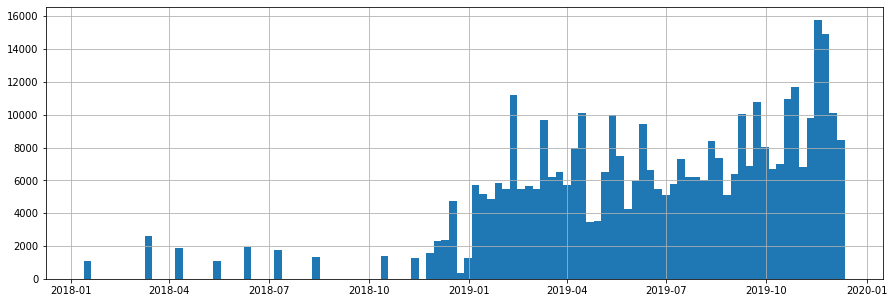

In [33]:
# we ll check data distribution 
df['date'].hist(figsize=(15,5),bins=100)

In [34]:
df['date'].min()

Timestamp('2018-01-12 09:31:00')

In [35]:
df['date'].max()

Timestamp('2019-12-11 17:40:00')

In [36]:
# lets take data from January 2019
df = df[df['date'].dt.strftime('%Y-%m-%d') > '2018-12-31']

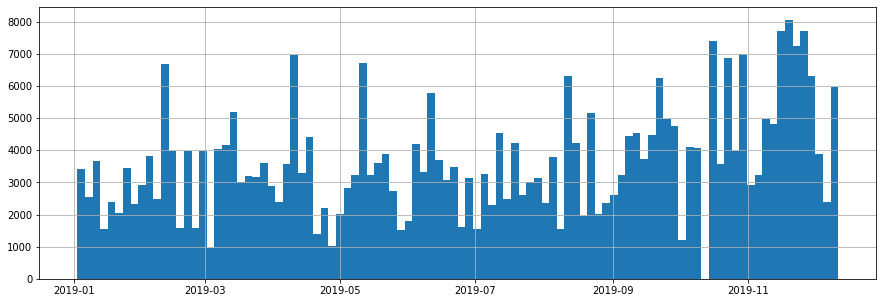

In [37]:
df['date'].hist(figsize=(15,5),bins=100)

In [38]:
df['date'].min()

Timestamp('2019-01-02 08:18:00')

In [39]:
df['date'].max()

Timestamp('2019-12-11 17:40:00')

In [40]:
# lets check unique values 
df[['invoiceno', 'stockcode','customerid']].apply(lambda x: x.nunique())

invoiceno     17132
stockcode      3596
customerid     4219
dtype: int64

In [41]:
df['unitprice'].describe()


count    367022.000000
mean          3.124722
std          22.964387
min           0.001000
25%           1.250000
50%           1.850000
75%           3.750000
max        8142.750000
Name: unitprice, dtype: float64

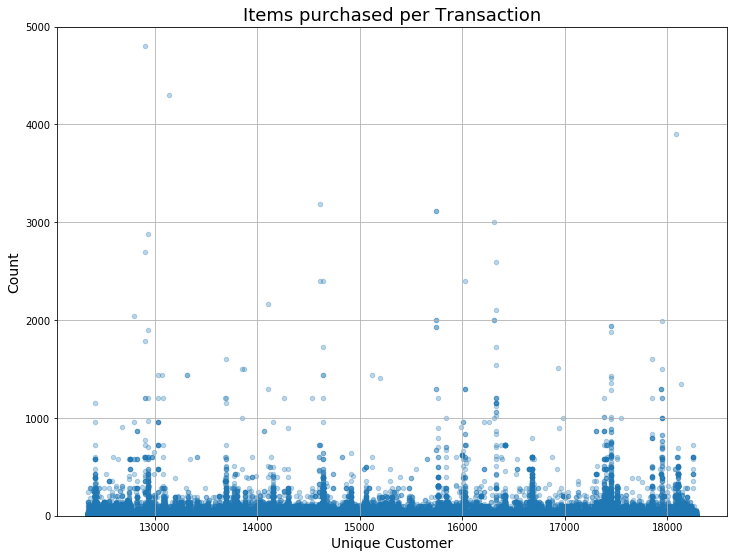

In [42]:
# we ll plot a graph to see the number of items purchased per transaction

df.plot(x = 'customerid', y = 'quantity', kind = 'scatter', grid = True, alpha=0.3, figsize=(12,9))
plt.ylabel("Count", size=14)
plt.xlabel("Unique Customer", size=14)
plt.title("Items purchased per Transaction", size=18)
plt.ylim([0, 5000]);

<font color = 'purple'>**We can see that mostly people buy  cheap goods with cost around 1.85$. We ve got 17132 orders, 3596 unique items sold and 4219 unique customers and most people are buying less then 700 goods, also we have some wholesale buys**</font>

In [43]:
#lets check our top transactions by quantity
wholesale = df.query('quantity >= 500')
wholesale.sort_values(by = 'quantity', ascending = False).head(20)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price
392226,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/07/2019 09:15,2.08,16446,2019-07-12 09:15:00,4,7,2019,201907,2019-07-12,9,168469.60
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,01/16/2019 10:01,1.04,12346,2019-01-16 10:01:00,2,1,2019,201901,2019-01-16,10,77183.60
304654,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/25/2019 12:26,0.21,12901,2019-10-25 12:26:00,4,10,2019,201910,2019-10-25,12,1008.00
141558,554868,22197,SMALL POPCORN HOLDER,4300,05/25/2019 10:52,0.72,13135,2019-05-25 10:52:00,5,5,2019,201905,2019-05-25,10,3096.00
60687,544612,22053,EMPIRE DESIGN ROSETTE,3906,02/20/2019 10:43,0.82,18087,2019-02-20 10:43:00,2,2,2019,201902,2019-02-20,10,3202.92
186665,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,07/17/2019 17:04,0.06,14609,2019-07-17 17:04:00,2,7,2019,201907,2019-07-17,17,191.16
108204,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,04/16/2019 13:20,2.10,15749,2019-04-16 13:20:00,1,4,2019,201904,2019-04-16,13,6539.40
32199,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,01/09/2019 12:55,2.10,15749,2019-09-01 12:55:00,6,9,2019,201909,2019-09-01,12,6539.40
314508,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,10/31/2019 11:24,0.32,16308,2019-10-31 11:24:00,3,10,2019,201910,2019-10-31,11,960.00
201787,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,08/02/2019 18:06,1.45,12931,2019-02-08 18:06:00,4,2,2019,201902,2019-02-08,18,4176.00


In [44]:
totsale_wh = wholesale['total_price'].sum()
totsale_wh

635029.4099999999

In [45]:
therest_totsale = df.query('quantity <= 499')
therest_totsale['total_price'].sum()

7681756.753999999

<font color = 'purple'>**We can see that mostly wholesale buys are 'paper craft , little birdie', 'medium ceramic top storage jar', 'world war 2 gliders asstd designs', 'small popcorn holder' and we ll define wholesale buys with quantity more then 500 items, so we can see total sales from wholesale is 635029 and from the rest is 7681756. So we can see that wholesale buyers dont really bring the shop money**</font>

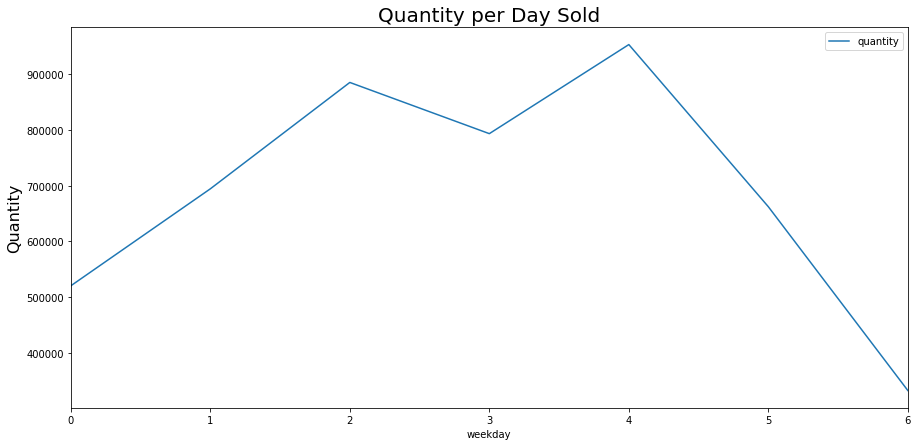

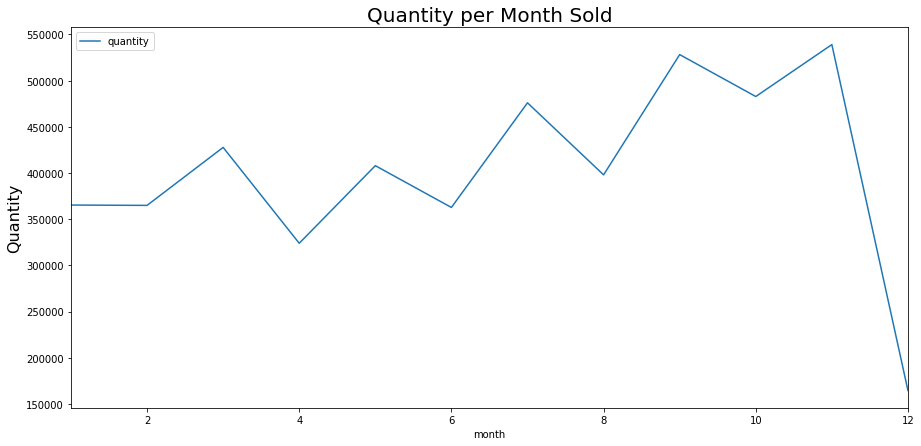

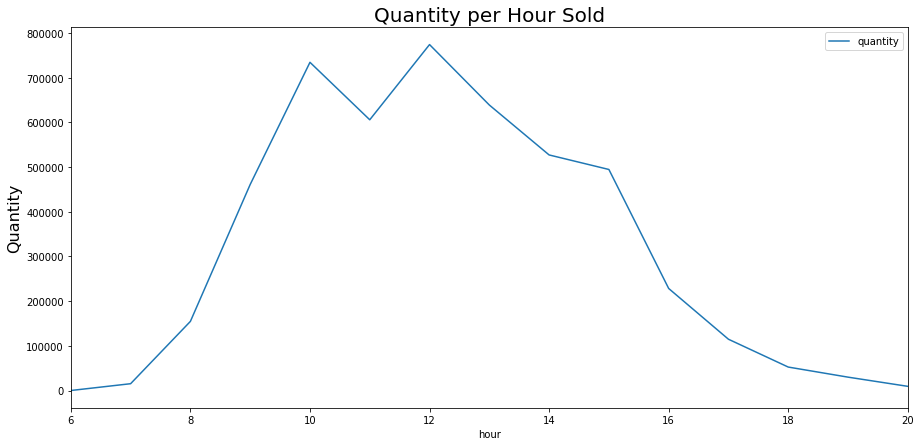

In [46]:
# we ll plot how many items sold per day
quantity_per_day = df.groupby(['weekday']).agg({'quantity': 'sum'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Day Sold', fontsize=20)
plt.ylabel("Quantity", fontsize=16)
quantity_per_day.plot(ax=ax)

# we ll plot how many items sold per month
quantity_per_month = df.groupby(['month']).agg({'quantity': 'sum'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Month Sold', fontsize=20)
plt.ylabel("Quantity", fontsize=16)
quantity_per_month.plot(ax=ax)

# we ll plot how many items sold per hour
quantity_per_hour = df.groupby(['hour']).agg({'quantity': 'sum'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Hour Sold', fontsize=20)
plt.ylabel("Quantity", fontsize=16)
quantity_per_hour.plot(ax=ax)
plt.show()

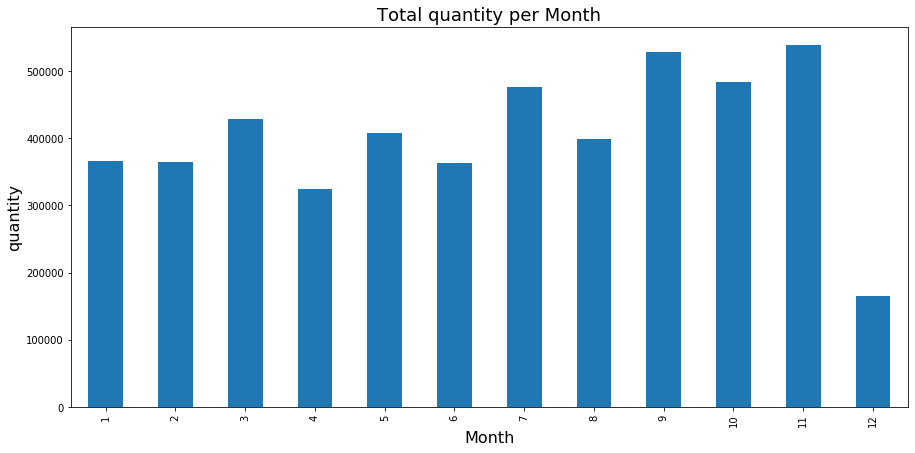

In [47]:
# we ll plot a graph to get total quantity per month
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('month')['quantity'].sum().plot.bar()
plt.ylabel("quantity", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.title("Total quantity per Month", fontsize=18)
plt.show()

In [48]:
df['revenue'] = df.unitprice * df.quantity

In [49]:
df.sample()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price,revenue
76967,546530,20975,12 PENCILS SMALL TUBE RED RETROSPOT,768,03/12/2019 13:25,0.65,17404,2019-12-03 13:25:00,1,12,2019,201912,2019-12-03,13,499.2,499.2


In [50]:
total_revenue = df['revenue'].sum()
total_revenue

8316786.163999999

In [51]:
rev = df.groupby([df['customerid'], df['date'].dt.to_period('M')])['unitprice'].sum()
rev = rev.reset_index().rename(columns = {'unitprice':'revenue'})
rev

,customerid,date,revenue
0,12346,2019-01,1.04
1,12347,2019-01,73.17
2,12347,2019-05,75.83
3,12347,2019-07,121.86
4,12347,2019-10,120.76
...,...,...,...
11861,18283,2019-10,81.82
11862,18283,2019-11,205.96
11863,18283,2019-12,138.49
11864,18287,2019-05,56.92


In [52]:
rev_monthly = df.groupby('month')['revenue'].sum().reset_index()
rev_monthly

,month,revenue
0,1,610534.560
1,2,618825.930
2,3,699420.690
3,4,524616.761
4,5,736164.340
5,6,598304.350
6,7,821445.681
7,8,703122.760
8,9,958177.872
9,10,818292.610


In [53]:
fig = px.line(rev_monthly , x="month", y="revenue", title='Revenue per month')
fig.show()

<font color = 'purple'>**We can see picks of sells in September and November, on Tuesdays and Thursdays, at 10 o'clock and 12 o'clock and the top revenue is September and November. I think Septenber is the first month after summer vacations and school starts and a lot of people getting back to normal life and start to buy goods, in November it is preparation before Christmas time**</font>

In [54]:
#now we ll divide our data by seasons
Y = 2019 
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(date.today()))

spring


In [55]:
df['season'] = df['day'].apply(get_season)
df.sample(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price,revenue,season
209159,563245,20713,JUMBO BAG OWLS,10,08/13/2019 10:53,2.08,16272,2019-08-13 10:53:00,1,8,2019,201908,2019-08-13,10,20.8,20.8,summer
163247,557630,21931,JUMBO STORAGE BAG SUKI,10,06/19/2019 14:53,2.08,13178,2019-06-19 14:53:00,2,6,2019,201906,2019-06-19,14,20.8,20.8,spring
182715,560209,20839,FRENCH PAISLEY CUSHION COVER,6,07/13/2019 14:05,0.85,15004,2019-07-13 14:05:00,5,7,2019,201907,2019-07-13,14,5.1,5.1,summer
351918,577504,23583,LUNCH BAG PAISLEY PARK,6,11/18/2019 12:36,1.65,14159,2019-11-18 12:36:00,0,11,2019,201911,2019-11-18,12,9.9,9.9,autumn
93643,548612,22382,LUNCH BAG SPACEBOY DESIGN,4,03/30/2019 11:34,1.65,13137,2019-03-30 11:34:00,5,3,2019,201903,2019-03-30,11,6.6,6.6,spring


<div class="alert alert-success"> Love to see that function! Good job!

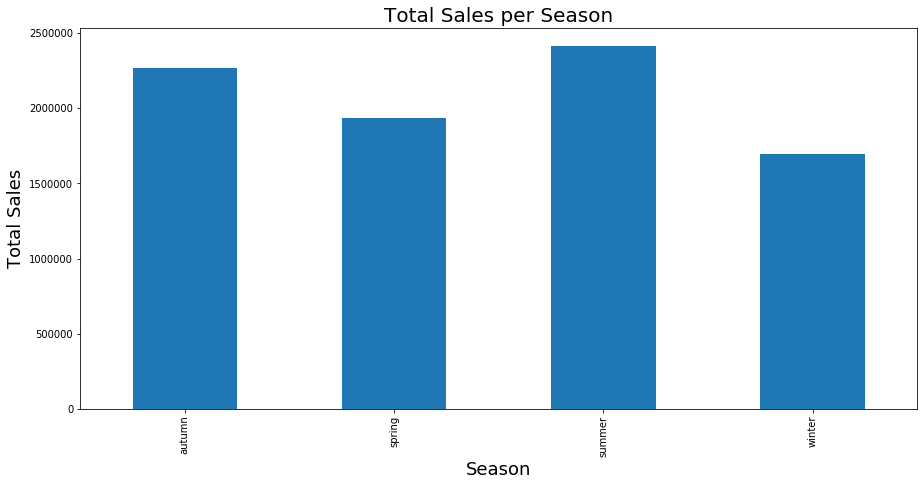

In [56]:
# plotting a histogram for total sales per season
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('season')['total_price'].sum().plot.bar()
plt.ylabel("Total Sales", fontsize=18)
plt.xlabel("Season", fontsize=18)
plt.title("Total Sales per Season", fontsize=20)
plt.show()

In [57]:
#now we ll devide products by categories


import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
df['description'] = df['description'].str.lower()
df['lemmatized'] = df['description'].apply(lemmatize_text)
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price,revenue,season,lemmatized
25670,539993,22386,jumbo bag pink polkadot,10,01/02/2019 10:00,1.95,13313,2019-02-01 10:00:00,4,2,2019,201902,2019-02-01,10,19.5,19.5,winter,"[jumbo, bag, pink, polkadot]"
25671,539993,21499,blue polkadot wrap,25,01/02/2019 10:00,0.42,13313,2019-02-01 10:00:00,4,2,2019,201902,2019-02-01,10,10.5,10.5,winter,"[blue, polkadot, wrap]"
25672,539993,21498,red retrospot wrap,25,01/02/2019 10:00,0.42,13313,2019-02-01 10:00:00,4,2,2019,201902,2019-02-01,10,10.5,10.5,winter,"[red, retrospot, wrap]"
25673,539993,22379,recycling bag retrospot,5,01/02/2019 10:00,2.10,13313,2019-02-01 10:00:00,4,2,2019,201902,2019-02-01,10,10.5,10.5,winter,"[recycling, bag, retrospot]"
25674,539993,20718,red retrospot shopper bag,10,01/02/2019 10:00,1.25,13313,2019-02-01 10:00:00,4,2,2019,201902,2019-02-01,10,12.5,12.5,winter,"[red, retrospot, shopper, bag]"


In [59]:
# we ll identify the 50 most frequent words

from collections import Counter
frequencies = Counter(word for sentence in df['lemmatized'] for word in sentence)

for word, frequency in frequencies.most_common(50):  
    print(word, frequency)

of 38296
set 38193
bag 36147
heart 30339
red 29497
retrospot 24173
vintage 24170
design 22323
pink 18883
box 18212
christmas 17247
cake 15910
jumbo 14742
metal 14563
white 14425
lunch 14175
3 13320
blue 12858
tin 12037
hanging 11835
sign 11792
holder 11613
card 11294
pack 11116
t-light 10220
paper 9963
small 9413
wooden 9370
decoration 9342
6 9009
case 8984
12 8280
tea 8160
polkadot 8151
spaceboy 8011
glass 7787
in 7648
bottle 7641
home 7392
pantry 7266
rose 7260
and 7171
large 6802
hot 6579
regency 6481
4 6366
ceramic 6322
with 6319
candle 6309
doormat 6309


In [60]:
df['description'].value_counts().head(30)

white hanging heart t-light holder    1809
regency cakestand 3 tier              1574
jumbo bag red retrospot               1531
party bunting                         1366
assorted colour bird ornament         1302
lunch bag red retrospot               1247
set of 3 cake tins pantry design      1105
postage                               1035
lunch bag  black skull.               1032
spotty bunting                        1014
pack of 72 retrospot cake cases        975
lunch bag spaceboy design              951
lunch bag cars blue                    942
lunch bag suki design                  915
natural slate heart chalkboard         913
lunch bag pink polkadot                912
set of 4 pantry jelly moulds           881
lunch bag apple design                 878
heart of wicker small                  873
paper chain kit 50's christmas         868
baking set 9 piece retrospot           854
jumbo bag pink polkadot                849
rabbit night light                     823
retrospot t

In [61]:
#lists of words for each category

vintage = ['vintage','antique','retrospot','traditional','retro','classic']
bags = ['bag', 'shopper', 'backpack','charm']
christmas = ['christmas', 'snowflake']
assorted_goods = ['assorted']
decoration_and_party = ['decoration', 'polkadot','ornament', 'party', 'birthday','candle','ribbon','wrap','frame','candle','feltcraft','glitter','craft']
home_and_design = ['home', 'design', 'sign', 'garden', 'frame','chandelier', 'clock', 'towel','wall','doormat','lantern','door','cabinet','toilet','mug',
        'bathroom','bath','cushion','light','flower','mirror','bedroom','photo']
ceramic = ['ceramic']
kitchen = ['kitchen', 'cake', 'bowl', 'moulds','jar','cup','bottle','pantry','tea','tin','lunch','napkins',
           'coffee','apron','jug','bread','cream','picnic','plate','dish']
children = ['childrens','girl','heart','card','toy','magic', 'boy']
sets = ['set','pack','bundle', 'kit']
stationery = ['pencil','pen','draw','marker','paint','notebook','sketchbook']



total_categories = {
    'vintage': vintage, 
    'bags' : bags, 
    'christmas' : christmas, 
    'assorted goods' : assorted_goods, 
    'decoration_and_party' : decoration_and_party, 
    'home & design' : home_and_design, 
    'ceramic' : ceramic,
    'kitchen & dishes' : kitchen,
    'children' : children,
    'sets' : sets,
    'stationery' : stationery
}

In [62]:
def categories(lemmas):
    for category_list in total_categories:
        if len(set(lemmas).intersection(set(total_categories[category_list]))) > 0:
            return category_list
        else:
            continue

In [63]:
df['category'] = df['lemmatized'].apply(categories)
df.sample(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price,revenue,season,lemmatized,category
119424,552037,22966,gingerbread man cookie cutter,24,05/03/2019 19:48,1.25,13450,2019-03-05 19:48:00,1,3,2019,201903,2019-03-05,19,30.00,30.00,winter,"[gingerbread, man, cookie, cutter]",None
49605,543162,22795,sweetheart recipe book stand,1,02/01/2019 18:08,6.75,17507,2019-01-02 18:08:00,2,1,2019,201901,2019-01-02,18,6.75,6.75,winter,"[sweetheart, recipe, book, stand]",None
39587,541847,22284,hen house decoration,12,01/21/2019 13:25,1.65,15443,2019-01-21 13:25:00,0,1,2019,201901,2019-01-21,13,19.80,19.80,winter,"[hen, house, decoration]",decoration_and_party
207418,563061,21916,set 12 retro white chalk sticks,24,08/09/2019 15:25,0.42,13588,2019-09-08 15:25:00,6,9,2019,201909,2019-09-08,15,10.08,10.08,summer,"[set, 12, retro, white, chalk, stick]",vintage
61969,544717,22517,childs garden rake pink,6,02/21/2019 10:44,2.10,18172,2019-02-21 10:44:00,3,2,2019,201902,2019-02-21,10,12.60,12.60,winter,"[child, garden, rake, pink]",home & design


In [64]:
df['category'].value_counts()

home & design           62272
vintage                 59324
kitchen & dishes        45198
decoration_and_party    42695
children                27599
bags                    27459
sets                    19119
christmas               11095
stationery               5635
assorted goods           5312
ceramic                  4744
Name: category, dtype: int64

In [65]:
df.isna().sum()

invoiceno          0
stockcode          0
description        0
quantity           0
invoicedate        0
unitprice          0
customerid         0
date               0
weekday            0
month              0
year               0
YearMonth          0
day                0
hour               0
total_price        0
revenue            0
season             0
lemmatized         0
category       56570
dtype: int64

In [66]:
df['category'] = df['category'].fillna('other')

In [67]:
by_category = df.groupby('category')['quantity'].sum()
by_category

category
assorted goods          154742
bags                    372031
ceramic                 140714
children                380640
christmas               174307
decoration_and_party    651273
home & design           649080
kitchen & dishes        539730
other                   678619
sets                    254625
stationery               96235
vintage                 748958
Name: quantity, dtype: int64

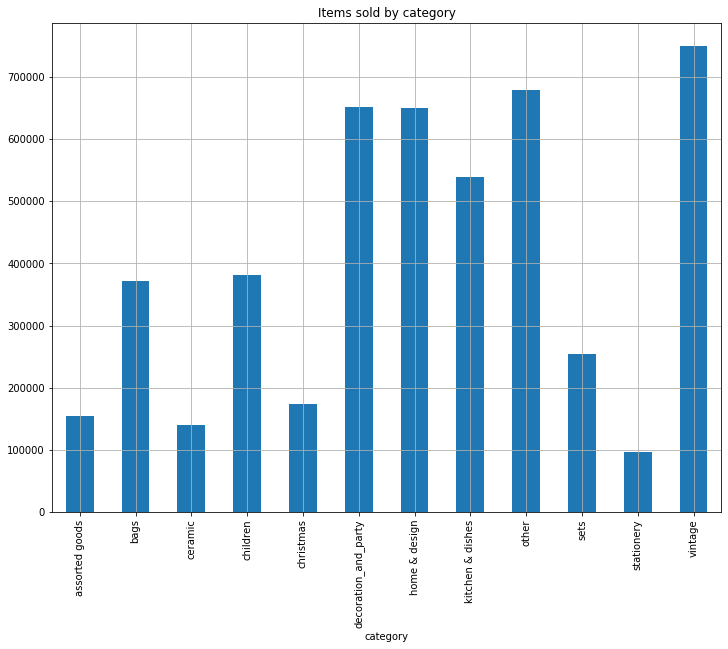

In [68]:
by_category.plot(kind = 'bar',title = 'Items sold by category', grid=True, figsize=(12,9));

In [69]:
#we ll check how number of items sold changes by category
time_pivot = df.pivot_table(
            index = ['month'],
            columns = 'category',
            values = 'quantity',
            aggfunc = 'sum').reset_index()
time_pivot.head()

category,month,assorted goods,bags,ceramic,children,christmas,decoration_and_party,home & design,kitchen & dishes,other,sets,stationery,vintage
0,1,8372,16727,78264,29848,4072,37404,43951,35140,45637,18462,4204,43220
1,2,16351,23454,6413,25739,7883,49336,56018,37771,54857,21908,9013,56177
2,3,14418,37345,4949,32144,5658,55250,58836,52906,63265,30094,8119,64728
3,4,12399,25273,5502,25284,6521,37530,50380,36915,50669,15822,6216,51417
4,5,11487,36636,6374,31835,7781,49123,58162,50227,65300,20745,8382,61879


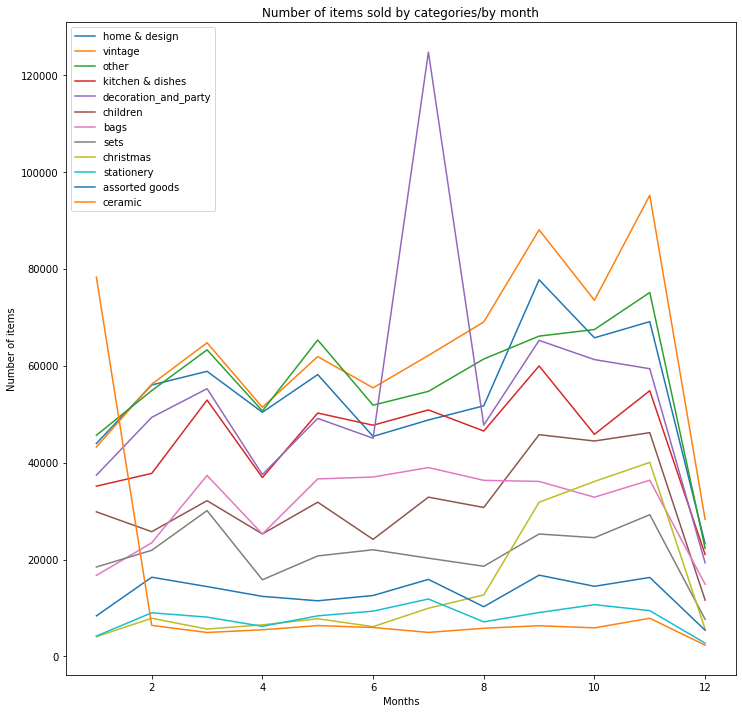

In [70]:
fig, ax = plt.subplots()

for i in df['category'].value_counts().keys().tolist():
    ax.plot(time_pivot['month'], time_pivot[[i]], label=i)
    leg = ax.legend()
    
fig.set_figwidth(12)
fig.set_figheight(12) 
plt.title('Number of items sold by categories/by month')
plt.ylabel('Number of items')
plt.xlabel('Months')
plt.show()

<font color = 'purple'>**We can see that top categories are vintage, decoration and party, home and design and kitchen and dishes. Decoration and party has a high spike at July and Christmas category in November, Home and Design and Kitchen and dishes are top in September**</font>

In [71]:
g = wholesale.groupby('invoiceno')['quantity'].sum().reset_index()
g.sort_values(by = 'quantity', ascending = False).head(10)

,invoiceno,quantity
263,581483,80995
12,541431,74215
182,567423,12200
70,550461,9014
9,540815,7044
146,562439,5932
45,546789,5700
101,556267,5124
173,566595,4896
217,573008,4800


## Test the following hypotheses <a name= "step4"> </a>

So for our hypotheses check we ll have H0  - revenue in winter season and summer season is the same. H1 will  - revenue in winter season and summer season differs. We ll use the standart alpha value 0.05 The Shapiro test showed us that distibution of slices are not normal so it is better to use Mann-whitney test. The test result is null hypotheses is rejected. It means that revenue in winter season and summer season not equal.

In [72]:
winter = df.query('season == "winter"')
winter.sample(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price,revenue,season,lemmatized,category
36645,541485,22977,dolly girl childrens egg cup,1,01/16/2019 13:05,1.25,18118,2019-01-16 13:05:00,2,1,2019,201901,2019-01-16,13,1.25,1.25,winter,"[dolly, girl, childrens, egg, cup]",kitchen & dishes
65975,545163,22991,giraffe wooden ruler,12,02/26/2019 13:39,1.95,16607,2019-02-26 13:39:00,1,2,2019,201902,2019-02-26,13,23.40,23.40,winter,"[giraffe, wooden, ruler]",other
45044,542599,84378,set of 3 heart cookie cutters,3,01/28/2019 11:01,1.25,17062,2019-01-28 11:01:00,0,1,2019,201901,2019-01-28,11,3.75,3.75,winter,"[set, of, 3, heart, cookie, cutter]",children
79524,546855,20725,lunch bag red retrospot,4,03/15/2019 13:58,1.65,18168,2019-03-15 13:58:00,4,3,2019,201903,2019-03-15,13,6.60,6.60,winter,"[lunch, bag, red, retrospot]",vintage
40293,541883,21673,white spot blue ceramic drawer knob,24,01/22/2019 10:56,1.25,13408,2019-01-22 10:56:00,1,1,2019,201901,2019-01-22,10,30.00,30.00,winter,"[white, spot, blue, ceramic, drawer, knob]",ceramic


In [73]:
summer = df.query('season == "summer"')
summer.sample(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,weekday,month,year,YearMonth,day,hour,total_price,revenue,season,lemmatized,category
186349,560571,23297,set 40 heart shape petit four cases,16,07/17/2019 14:29,1.65,17735,2019-07-17 14:29:00,2,7,2019,201907,2019-07-17,14,26.40,26.40,summer,"[set, 40, heart, shape, petit, four, case]",children
101873,549690,21982,pack of 12 suki tissues,6,04/09/2019 13:41,0.29,17841,2019-09-04 13:41:00,2,9,2019,201909,2019-09-04,13,1.74,1.74,summer,"[pack, of, 12, suki, tissue]",sets
152507,556245,22916,herb marker thyme,1,06/07/2019 16:10,0.65,17841,2019-07-06 16:10:00,5,7,2019,201907,2019-07-06,16,0.65,0.65,summer,"[herb, marker, thyme]",stationery
168343,558311,22467,gumball coat rack,36,06/26/2019 11:22,2.10,14646,2019-06-26 11:22:00,2,6,2019,201906,2019-06-26,11,75.60,75.60,summer,"[gumball, coat, rack]",other
32161,540813,84559B,3d sheet of cat stickers,13,01/09/2019 12:41,0.85,14669,2019-09-01 12:41:00,6,9,2019,201909,2019-09-01,12,11.05,11.05,summer,"[3d, sheet, of, cat, sticker]",other


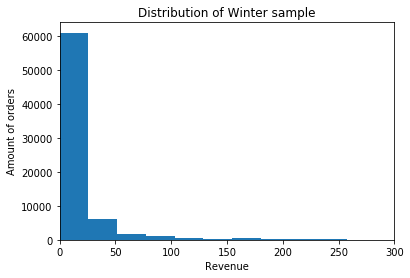

In [74]:
plt.hist(winter['revenue'], bins = 3000)
plt.xlim(0,300)
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.title('Distribution of Winter sample')
plt.show()

In [75]:
from scipy.stats import shapiro

shapiro(winter['revenue'])

(0.014370262622833252, 0.0)

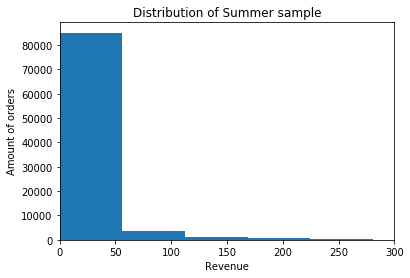

In [76]:
plt.hist(summer['revenue'], bins = 3000)
plt.xlim(0,300)
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.title('Distribution of Summer sample')
plt.show()

In [77]:
from scipy.stats import shapiro

shapiro(summer['revenue'])

(0.005955100059509277, 0.0)

In [78]:
import scipy.stats as stats

alpha = .05
results = stats.mannwhitneyu(winter['revenue'], summer['revenue'], alternative='two-sided')
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.271599671350258e-16
We reject the null hypothesis


## General conclusion <a name= "step5"> </a>

- We've got total 17132 orders for 2019 Year, 3596 unique items sold, 4219 unique customers 

- Most of customers buy no more then 500 goods, the most sales are coming from regular customers, not wholesale buys, so it is wiser to concentrate on the marketing strategy for individual buys 

- Customers prefer cheap goods with cost around 1.85, so maybe we can keep customers buying by generating more special offers around this price

- Picks of sells and top revenue were detected in September ( 958177.872) and November (920136.470) This activity comes with Back to school months and people getting back to normal life from summer vacations and another spike is during pre-winter holiday preparations 

- Picks of sells in weekdays are on Tuesdays and Thursdays in time are at 10 o'clock and 12 o'clock. If we want to calm down these pick hours we can try to offer customers deals for other days and times or even more benefits before those pich days and hours if we just want  to sell more goods on these picks

- Top selling categories are Vintage, Home and design and Kitchen and dishes. Categories Decoration and party has a high spike at July and Christmas category in November, Home and Design and Kithchen and dishes are top in September. Maybe the shop should wide the assortment of these topselling kinds of goods and exclude the nonprofitable to make some more space in warehouses and empower the really profitable categories

- The Summer season is top revenue season,then the autumn and spring, and the revenue for winter season is the lowest. We can make an assuption that there is not enough attractive goods for winter season and work on it


## Dashboard <a name= "step6"> </a>

https://public.tableau.com/profile/anna.mirgazizova#!/vizhome/ProductRange_16219786536940/Dashboard1?publish=yes

## Presentation <a name= "step7"> </a>

https://drive.google.com/file/d/1qgDw7rZNCrHXB7tkE0qA2MkL89KyEXyP/view?usp=sharing

## Links <a name= "step8"> </a>

https://www.storiesondata.com/post/data-analysis-using-python-sales-analysis

https://towardsdatascience.com/exploratory-data-analysis-using-spermarket-sales-data-in-python-e99d329a07fc

https://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime

https://www.guru99.com/python-counter-collections-example.html